In [1]:
# 필요한 라이브러리 다시 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 파일 다시 읽기
competition_info = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/competition_info.csv')
participate_log = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/participate_log.csv')
submission_log = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/submission_log.csv')
talk_log = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/talk_log.csv')
codeshare_log = pd.read_csv('C:/Users/82106/Desktop/데이터분석 프로젝트/데이콘 경진대회/data/open/codeshare_log.csv')

# 대회별 참가자 수, 제출 수, 토크 수, 코드 공유 수 집계
participate_counts = participate_log.groupby('ID')['참가자 수'].sum()
submission_counts = submission_log.groupby('ID')['제출 수'].sum()
talk_counts = talk_log.groupby('ID').agg({'토크 수':'sum', '댓글 수':'sum'})
codeshare_counts = codeshare_log.groupby('ID')['코드 공유 수'].sum()

# 모든 데이터를 하나의 데이터프레임으로 합치기
combined_df = pd.DataFrame({
    '참가자 수': participate_counts,
    '제출 수': submission_counts,
    '토크 수': talk_counts['토크 수'],
    '댓글 수': talk_counts['댓글 수'],
    '코드 공유 수': codeshare_counts
}).reset_index()

# competition_info와 결합하여 대회명과 다른 정보 포함
trend_analysis_df = pd.merge(combined_df, competition_info[['ID', '대회명', '시작시간', '종료시간']], on='ID', how='left')

# 연도별 평균 참가자 수, 제출 수, 토크 및 코드 공유 수 계산
yearly_averages = trend_analysis_df.groupby(pd.to_datetime(trend_analysis_df['시작시간']).dt.year).mean()

# 특성과 타겟 데이터 준비 (연도별 통계만 사용)
features = yearly_averages[['참가자 수', '제출 수', '토크 수', '코드 공유 수']].values
target = yearly_averages.index.values  # 연도를 타겟으로 사용

# 훈련 세트와 테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse


7.795299999999525

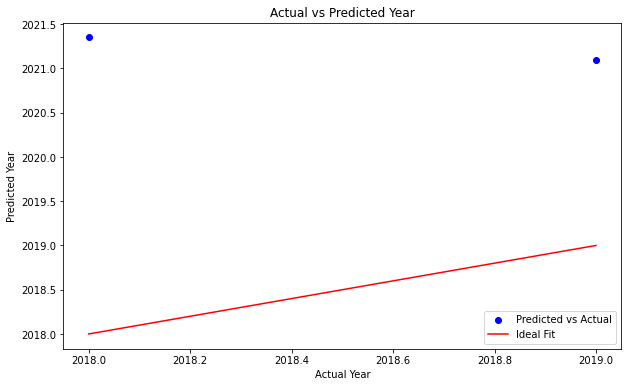

In [2]:
import matplotlib.pyplot as plt

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='red', label='Ideal Fit')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Actual vs Predicted Year')
plt.legend()
plt.show()
